In [214]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [231]:
# load, clean, and normalize country-level lights data
with open('data/geo/pickles/zonal_stats_c.pickle') as f:
    gdf = pickle.load(f)
gdf = pd.DataFrame(gdf)
gdf = gdf.drop_duplicates(subset='WB_A3')
gdf = gdf.set_index('WB_A3')
gdf.drop(['ADMIN', 'CONTINENT', 'ISO_A3', 'REGION_UN', 'REGION_WB', 'SUBREGION', 'geometry'], axis=1, inplace=True)
gdf_normalizer = (gdf.F101992).as_matrix()
gdf_normed = gdf.divide(gdf_normalizer, axis=0)

# Load, clean, and normalize wb data
wb = pd.read_csv('data/econ/wb.csv')
wb = wb[wb['Series Name'] == 'GDP at market prices (constant 2005 US$)']
wb.drop(['Country Name', 'Series Name', 'Series Code', '2014', '2015'], axis=1, inplace=True)
wb.rename(columns={'Country Code':'WB_A3'}, inplace=True)
wb.dropna(axis=0, inplace=True)
wb = wb.set_index('WB_A3')
wb_normalizer = (wb['1992']).as_matrix()
wb_normed = wb.divide(wb_normalizer, axis=0)

# join lights and wb datasets
df = gdf_normed.join(wb_normed, how='inner'); df.head(100)

,F101992,F101993,F101994,F121994,F121995,F121996,F121997,F121998,F121999,F141997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
WB_A3,,,,,,,,,,,,,,,,,,,,,
ALB,1.0,2.628394,3.087411,4.743126,5.511153,4.825264,5.901003,6.095106,6.328117,2.821373,...,2.171891,2.296141,2.420845,2.563675,2.756720,2.849070,2.954770,3.030117,3.073145,3.107257
DZA,1.0,1.027205,1.034877,0.943117,1.220886,1.189387,1.340228,1.477018,1.291055,1.008942,...,1.451161,1.536776,1.562911,1.616044,1.648358,1.674731,1.735027,1.783618,1.842469,1.894054
ADO,1.0,1.016123,1.129977,1.146640,1.263556,1.161052,1.274365,1.236534,1.409386,1.066294,...,1.765047,1.903421,1.990699,1.992253,1.821033,1.751507,1.657836,1.578216,1.550439,1.549454
ATG,1.0,1.259259,1.249585,1.457435,1.457159,1.487562,1.636816,1.753179,1.917358,1.343007,...,1.525237,1.618020,1.834453,2.008707,2.010135,1.768195,1.641893,1.612447,1.677260,1.671452
ARG,1.0,1.308086,1.289016,1.268677,1.608017,1.619025,1.690065,1.890547,1.957747,1.370771,...,1.249995,1.364979,1.479672,1.597542,1.646661,1.647489,1.803197,1.954423,1.970094,2.026939
ARM,1.0,1.244161,0.686840,1.289834,0.898368,1.287783,1.606055,1.948021,1.227294,1.215753,...,2.061013,2.346788,2.656517,3.021767,3.230269,2.773186,2.834196,2.967403,3.181056,3.286031
AUS,1.0,1.109229,1.096984,1.115948,1.310579,1.275444,1.293549,1.357195,1.303903,1.086878,...,1.572996,1.623434,1.671860,1.734683,1.798983,1.831717,1.868687,1.913152,1.982652,2.031029
AUT,1.0,1.009266,0.967181,1.334042,1.392474,1.325794,1.345523,1.664861,1.711420,0.996796,...,1.307717,1.335709,1.380465,1.430459,1.452593,1.397407,1.424359,1.464356,1.475444,1.480186
AZE,1.0,1.278530,1.025285,1.447800,1.217037,1.109245,1.050077,1.205322,0.894174,0.743546,...,1.141184,1.442457,1.940105,2.426082,2.687429,2.940334,3.083068,3.085100,3.152972,3.335740


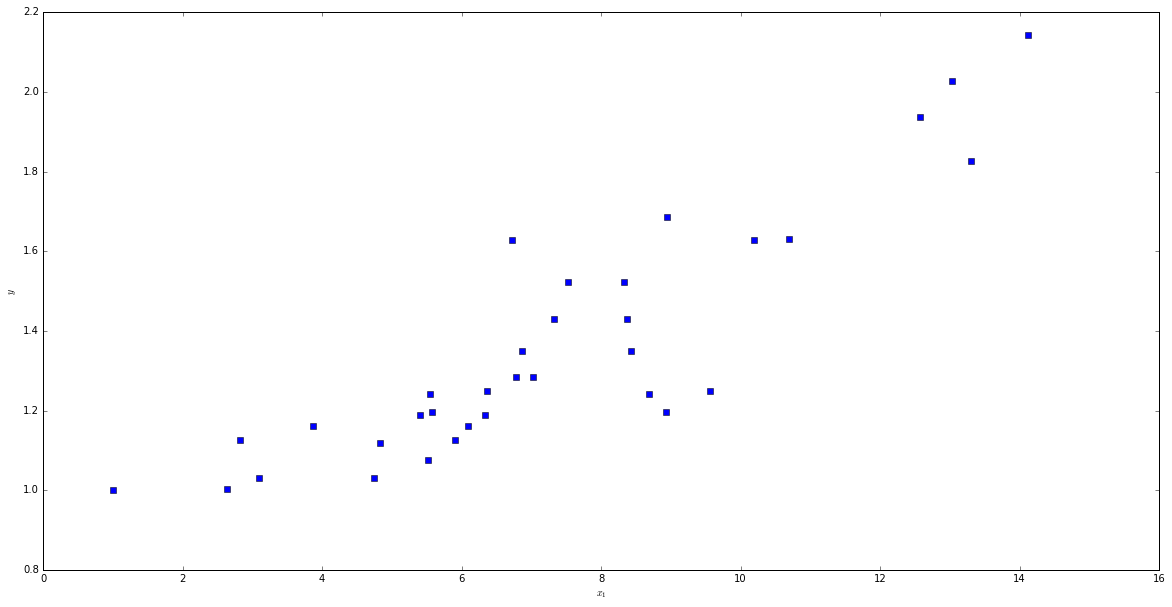

In [248]:
df_cols = df.columns.values
df_rows = df.index.values
years_lights_proto = df_cols[:34]
years_lights = []

for year in years_lights_proto:
    years_lights.append(year[3:])
years_gdp = df_cols[34:]

country = 'KEN'

country_lights = df.ix[country][0:34].tolist()
country_gdp = df.ix[country][34:].tolist()

country_list = []
for idx, year in enumerate(years_lights):
    
    #for gdp in alb_gdp:
    gdp = (df.ix[country][34:])[year]
    zipper = year, alb_lights[idx], gdp
    country_list.append(zipper)

Xy = np.asarray(country_list).T
X = Xy[1].astype(float)
y = Xy[2].astype(float)

plt.figure(figsize = (20,10))    #initiate the plot
#plt.plot(X['Ind_Variable_1'],y,'bs',lw=4)    #generate the plot
plt.plot(X,y,'bs',lw=4)    #generate the plot
plt.xlabel(r'$x_1$',fontsize=10)    #add an x label
plt.ylabel(r'$y$',fontsize=10)    #add a y label

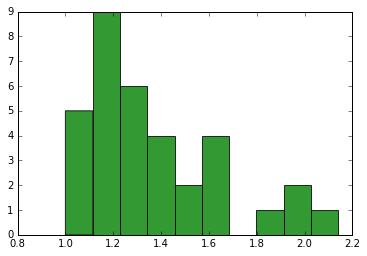

In [249]:
fig = plt.figure()
numBins = 10
ax = fig.add_subplot(111)
ax.hist(y,numBins,color='green',alpha=0.8)
plt.show()